In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# -------------------------------
# 1. 데이터 불러오기
# -------------------------------
df = pd.read_csv("train.csv")

In [7]:
# 주요 변수 선택
features = ["GrLivArea", "OverallQual", "YearBuilt", "FullBath", "GarageCars"]
X = df[features]
y = df["SalePrice"]

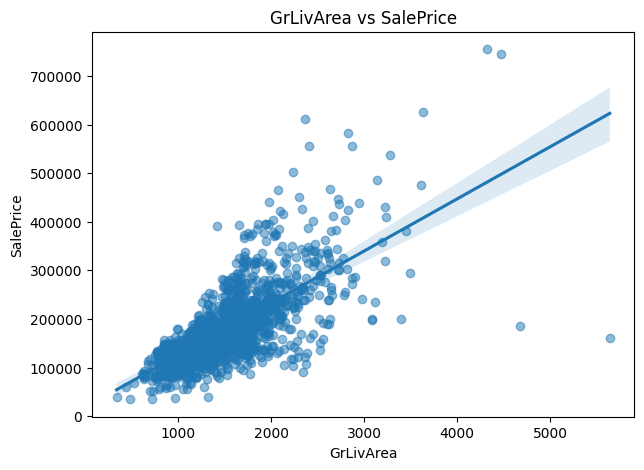

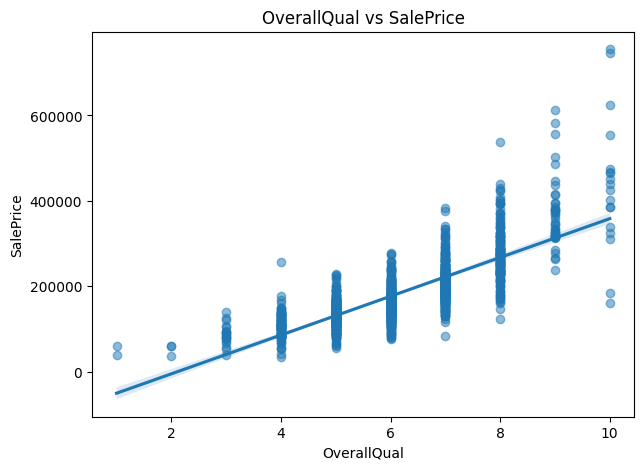

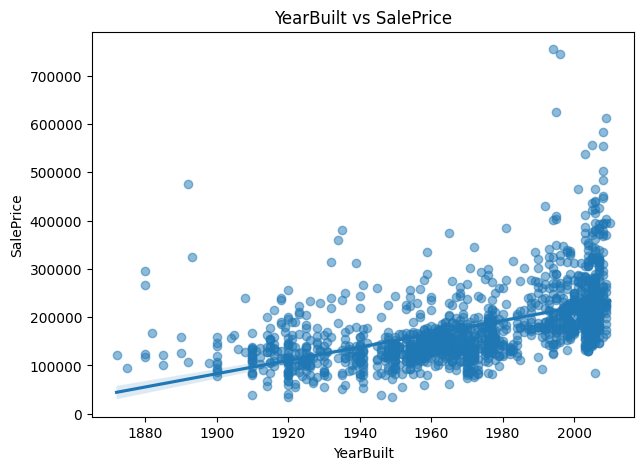

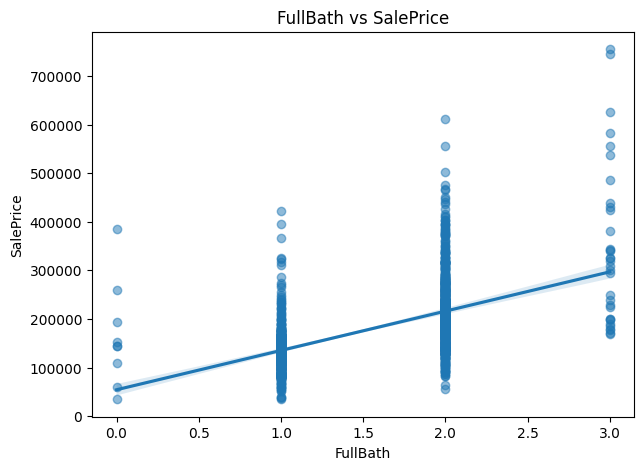

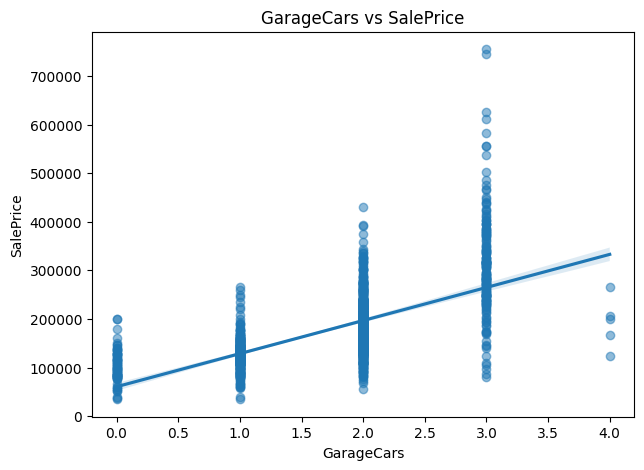

In [8]:
import seaborn as sns

for col in features:
    plt.figure(figsize=(7, 5))
    sns.regplot(data=df, x=col, y="SalePrice", scatter_kws={'alpha':0.5})
    plt.title(f"{col} vs SalePrice")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

In [9]:
# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# -------------------------------
# 2. 단순 선형회귀 모델
# -------------------------------
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [11]:
# 성능 평가
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [12]:
print("[단순 선형회귀 성능]")
print(f"R²: {r2_linear:.4f}")
print(f"RMSE: {rmse_linear:.2f}")

[단순 선형회귀 성능]
R²: 0.7663
RMSE: 42340.94


In [13]:
# -------------------------------
# 3. 다항 회귀 모델 (2차항 + 상호작용 포함)
# -------------------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
# 스케일링 (다항항은 크기 차이가 크므로 표준화 추천)
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [15]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [16]:
# 성능 평가
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [17]:
print("\n [다항 회귀 성능]")
print(f"R²: {r2_poly:.4f}")
print(f"RMSE: {rmse_poly:.2f}")


 [다항 회귀 성능]
R²: 0.8356
RMSE: 35505.86


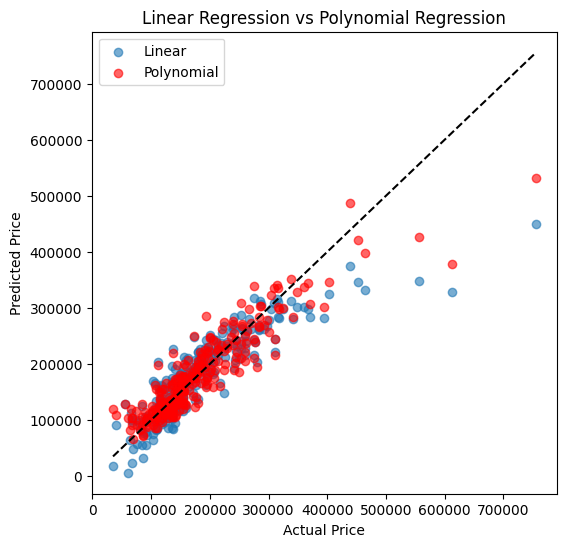

In [18]:
# -------------------------------
# 5. 실제값 vs 예측값 시각화
# -------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, label="Linear")
plt.scatter(y_test, y_pred_poly, alpha=0.6, label="Polynomial", color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression vs Polynomial Regression")
plt.legend()
plt.show()
